## ✅ Summary: Stochastic Quantum Simulation with Interaction Nets

### 🔬 **Objective**

Simulate a **locally causal, wavefunction-free model** of quantum behavior (inspired by Jacob Brandes’s framework) using **stochastic particle trajectories** in configuration space.

---

### 🧩 What was built

#### 1. **Stochastic Particle Simulator**

* Simulates a “double-slit” style experiment using only:

  * Local drift
  * Hidden variables
  * Stochastic noise
* Captures **interference-like effects** without invoking wavefunction collapse.

#### 2. **Interaction Net Representation**

* Reframed the system as an **interaction net**:

  * Nodes = `(time, particle_id)`
  * Edges = local causal updates via rewrite rules
* This makes the simulation visually and conceptually align with **graphical computation systems** and **locality in physics**.

#### 3. **Minkowski Worldline Visualization**

* Visualized particle **trajectories as worldlines** in a 2D spacetime plot.
* Inverted y-axis = time moving forward (like proper time in relativity).

#### 4. **Entropy-Weighted Color Mapping**

* Measured **local entropy** (stepwise path unpredictability) per particle.
* Color-coded worldlines to reflect **information gain** or **path irreversibility**.

---

## 🌱 Where You Could Go Next

### 🧠 Physics & Theory Directions

| Idea                           | Description                                                                                                                                   |
| ------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **Reversible Rules**           | Redefine the update rule as reversible by storing and replaying noise, or using deterministic reversible functions (e.g., cellular automata). |
| **Measurement as Interaction** | Model measurements as just another node interaction with no “special collapse”, i.e., a rewiring event.                                       |
| **Bell-type Experiments**      | Add binary measurement outcomes and simulate correlations with hidden variable constraints.                                                   |
| **Spacetime Causal Cone**      | Simulate a lightcone structure by expanding to 2D or 3D space and only allowing interactions within causal bounds.                            |

---

### 💻 Implementation & Visualization

| Idea                              | Description                                                                                                     |
| --------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **Animate Worldlines**            | Animate the flow of time step-by-step, optionally showing hidden variables.                                     |
| **Use Real Entropy Estimators**   | Estimate entropy using rolling windows, compression, or information gain.                                       |
| **Export to Interaction Net DSL** | Formalize your net into a rewriting language like the Geometry of Interaction or port to a visual graph engine. |
| **Neural Integration**            | Use learned local update rules (neural nets) and compare their behavior to fixed stochastic rules.              |

---

### 🔭 Bigger Picture

This simulation is a **prototype of an alternative quantum ontology**:

* One that emphasizes **stochastic causality**, not superposition.
* One that’s **empirically plausible**, visually intuitive, and **computationally local**.

It may inform future work on:

* **Quantum gravity** (if extended to spacetime structure)
* **Foundations of computation**
* **Energy-efficient AI systems** based on local processing


Locally Causal Stochastic Formulation

Concept: Replace the non-local wavefunction with local, stochastic laws that evolve a system’s configuration.

Code Path:

- Define a configuration space CC as a multidimensional state space.

- Encode stochastic laws as Markov kernels or transition probability functions.

- Sample trajectories over time using something like a Langevin or jump process

In [ ]:
import numpy as np

class LocalStochasticSystem:
    def __init__(self, config_dim, dt=0.1):
        self.dt = dt
        self.state = np.random.rand(config_dim)  # Initial configuration

    def evolve(self):
        noise = np.random.normal(0, self.dt, size=self.state.shape)
        self.state += self.local_drift() + noise  # stochastic trajectory

    def local_drift(self):
        # Encodes local causal rules; replace with physics-based logic
        return -0.5 * self.state


2. Stochastic Hidden Variables

  Concept: Hidden variables exist but follow non-deterministic, local rules.

  Code Path:

  - Embed hidden states in a dict or latent vector, updated via stochastic rules.

  - Model using stochastic differential equations (SDEs).

In [ ]:
class HiddenVariableModel(LocalStochasticSystem):
    def __init__(self, config_dim):
        super().__init__(config_dim)
        self.hidden = np.random.rand(config_dim)  # latent variables

    def evolve(self):
        self.hidden += np.random.normal(0, 0.1, self.hidden.shape)
        self.state += -0.5 * self.hidden + np.random.normal(0, self.dt, self.state.shape)


3. Unistochastic Systems

  Concept: Quantum systems as unitary → stochastic mappings. Stochastic matrix from unitary evolution.

  Code Path:

  Build a unitary matrix UU, then construct a unistochastic matrix
    
  $P_{ij}=|U_{ij}|$

  Use that for simulating probabilistic state transitions.

In [ ]:
def unistochastic_from_unitary(U):
    return np.abs(U)**2  # Element-wise squared magnitude

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)  # Hadamard gate
P = unistochastic_from_unitary(U)


4. Measurement as Stochastic Process

  Concept: Measurement is just ordinary interaction, not a special collapse event.

  Code Path:

  - Define a measurement operator as another stochastic update.

  - No wavefunction collapse; just probabilistic transformation.

In [ ]:
def measure(system_state, measurement_matrix):
    transition_probs = measurement_matrix @ system_state
    return np.random.choice(len(system_state), p=transition_probs)


5. Indivisibility & Interference

  Concept: Interference arises when systems can’t be decomposed into independent subparts.

  Code Path:

  - Use global evolution rules that consider entire configuration history or enforce global correlations.

In [ ]:
class IndivisibleSystem:
    def __init__(self, size):
        self.history = []
        self.state = np.random.rand(size)

    def evolve(self):
        interaction = np.sin(np.sum(self.state))  # global coupling
        noise = np.random.normal(0, 0.1, self.state.shape)
        self.state += interaction + noise
        self.history.append(self.state.copy())


6. Conditional Probabilities for Causality

Concept: Causality framed using conditional probabilities, avoiding "intervention".

Code Path:

  Explicitly construct and query conditional distributions.

  E.g., $P(A∣B)$ derived from simulation data.

In [ ]:
def conditional_probability(data, condition_idx, target_idx, condition_value):
    filtered = data[data[:, condition_idx] == condition_value]
    return np.bincount(filtered[:, target_idx]) / len(filtered)


## The Double Slit Experiment

In [ ]:
#@title Environment Setup and Particle Class
import numpy as np
import matplotlib.pyplot as plt

# Random seed for reproducibility
np.random.seed(42)

class Particle:
  _id_counter = 0
  def __init__(self, x0, slit_choice, id=None):
        self.id = Particle._id_counter
        Particle._id_counter += 1
        self.x = x0
        self.path = [x0]
        self.slit = slit_choice
        self.hidden_bias = np.random.randn() * 0.5  # stochastic hidden variable

  def step(self):
        # Drift toward center screen with slit-dependent bias
        coupling = 0.1 * np.sin(self.x) # Not strictly local now
        drift = -0.02 * self.x + self.hidden_bias + coupling
        noise = np.random.normal(0, 0.15)
        self.x += drift + noise
        self.path.append(self.x)


In [ ]:
#@title Simulator for Emitting Particles Through Slits.
def run_simulation_for_net(n_particles=50, slit_config=(True, True), steps=20):
    particles = []

    for _ in range(n_particles):
        possible_slits = []
        if slit_config[0]: possible_slits.append(-3.0)
        if slit_config[1]: possible_slits.append(3.0)
        if not possible_slits:
            continue

        slit = np.random.choice(possible_slits)
        p = Particle(x0=slit, slit_choice=slit)
        particles.append(p)

        for _ in range(steps):
            p.step()

    return particles

In [ ]:
def run_simulation(n_particles=500, slit_config=(True, True), steps=20):
    hits = []

    for _ in range(n_particles):
        # Choose slit: -1 = left, +1 = right
        possible_slits = []
        if slit_config[0]: possible_slits.append(-1.5)
        if slit_config[1]: possible_slits.append(1.5)
        if not possible_slits: continue

        slit = np.random.choice(possible_slits)
        p = Particle(x0=slit, slit_choice=slit)

        for _ in range(steps):
            p.step()

        hits.append(p.x)  # record final position on screen

    return np.array(hits)


In [ ]:
#@title Visualize Hits on the screen
def plot_hits(hits, title):
    plt.hist(hits, bins=50, density=True, alpha=0.7, color='navy')
    plt.title(title)
    plt.xlabel('Final X position (screen)')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

## Results

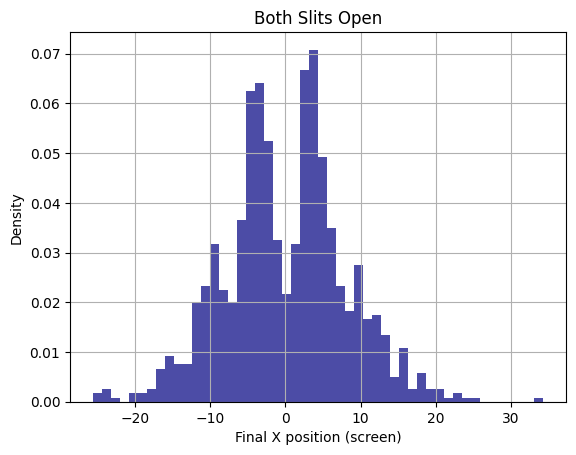

In [ ]:
#@title hits both
hits_both = run_simulation(n_particles=1000, slit_config=(True, True))
plot_hits(hits_both, "Both Slits Open")

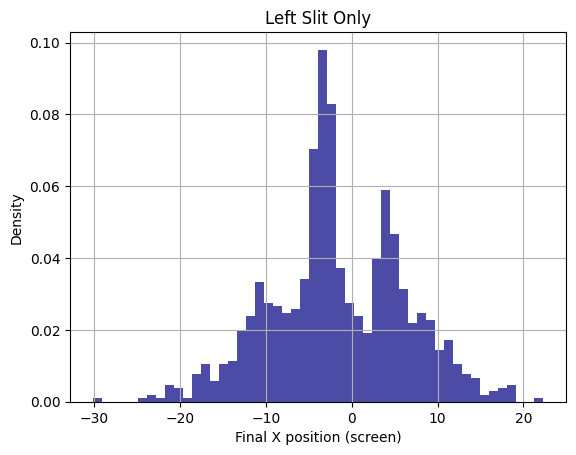

In [ ]:
#@title hits left
hits_left = run_simulation(n_particles=1000, slit_config=(True, False))
plot_hits(hits_left, "Left Slit Only")


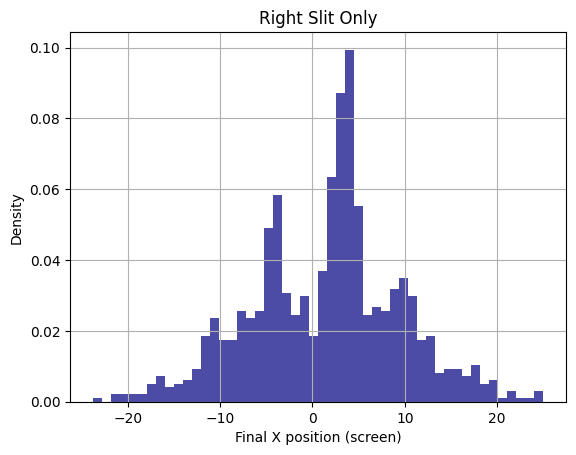

In [ ]:
#@title hits right
hits_right = run_simulation(n_particles=1000, slit_config=(False, True))
plot_hits(hits_right, "Right Slit Only")


##🧠 What You're Seeing
-  With both slits open, stochastic biases interact non-linearly — giving a complex, sometimes multi-peaked final histogram: an interference-like effect.
-  With one slit only, the pattern becomes smoother and single-lobed — no overlap, so no interference.
- No wavefunction, no collapse — all local, with simple noise + bias rules.

## Model as an Interaction Net.

In [ ]:
def rewrite_rule(particle):
    # Evolve 1 timestep based on hidden bias and coupling (local rule)
    coupling = 0.1 * np.sin(particle.x)
    drift = -0.02 * particle.x + particle.hidden_bias + coupling
    noise = np.random.normal(0, 0.1)
    particle.x += drift + noise
    particle.path.append(particle.x)
    return particle


In [ ]:
import networkx as nx

def build_interaction_net(particles, steps=20):
    net = nx.DiGraph()

    for p in particles:
        for t in range(steps):
            current_node = (t, p.id)
            next_node = (t + 1, p.id)
            entropy = rewrite_rule(p)
            net.add_node(current_node, x=p.x, slit=p.slit, hidden=p.hidden_bias, entropy=entropy)
            net.add_edge(current_node, next_node)

        # Properly annotate final node
        final_node = (steps, p.id)
        net.nodes[final_node]['x'] = p.x
        net.nodes[final_node]['slit'] = p.slit
        net.nodes[final_node]['hidden'] = p.hidden_bias
        net.nodes[final_node]['entropy'] = 0.0

    return net

## Embedding in Minkowski Spacetime.

In [ ]:
def plot_worldlines(particles, steps=20):
    plt.figure(figsize=(8, 6))
    for p in particles:
        t_vals = list(range(len(p.path)))
        plt.plot(p.path, t_vals, alpha=0.6)

    plt.title("Particle Worldlines in Minkowski Grid")
    plt.xlabel("Position (x)")
    plt.ylabel("Time (t)")
    plt.gca().invert_yaxis()  # time flows down
    plt.grid(True)
    plt.show()


In [ ]:
def draw_interaction_net_filtered(net):
    valid_nodes = [(t, pid) for (t, pid) in net.nodes if 'x' in net.nodes[(t, pid)]]
    pos = {(t, pid): (net.nodes[(t, pid)]['x'], -t) for (t, pid) in valid_nodes}
    colors = [net.nodes[n]['x'] for n in valid_nodes]

    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(net, pos, nodelist=valid_nodes, node_size=10, node_color=colors, cmap=plt.cm.plasma)
    nx.draw_networkx_edges(net, pos, edgelist=[(u, v) for (u, v) in net.edges if u in pos and v in pos], edge_color='gray')
    plt.title("Interaction Net: Particle Trajectories in (x, t)")
    plt.xlabel("x")
    plt.ylabel("t")
    plt.show()

In [ ]:
# Compute entropy per particle as average stepwise deviation
def compute_entropy_scores(particles):
    entropy_scores = {}
    for p in particles:
        deltas = np.abs(np.diff(p.path))  # |x_t - x_{t-1}|
        entropy = np.mean(deltas)         # average deviation
        entropy_scores[p.id] = entropy
    return entropy_scores

# Plot worldlines colored by entropy
def plot_worldlines_with_entropy(particles, entropy_scores):
    plt.figure(figsize=(10, 6))
    # Create an axes object
    ax = plt.gca()

    norm = plt.Normalize(min(entropy_scores.values()), max(entropy_scores.values()))
    cmap = plt.cm.plasma

    for p in particles:
        t_vals = list(range(len(p.path)))
        entropy = entropy_scores[p.id]
        # Plot lines on the created axes
        ax.plot(p.path, t_vals, color=cmap(norm(entropy)), alpha=0.8)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # Pass the axes object to the colorbar function
    plt.colorbar(sm, ax=ax, label='Path Entropy (avg |Δx|)')
    plt.title("Worldlines Colored by Local Entropy")
    plt.xlabel("x")
    plt.ylabel("t")
    ax.invert_yaxis()  # time flows down
    ax.grid(True)
    plt.show()

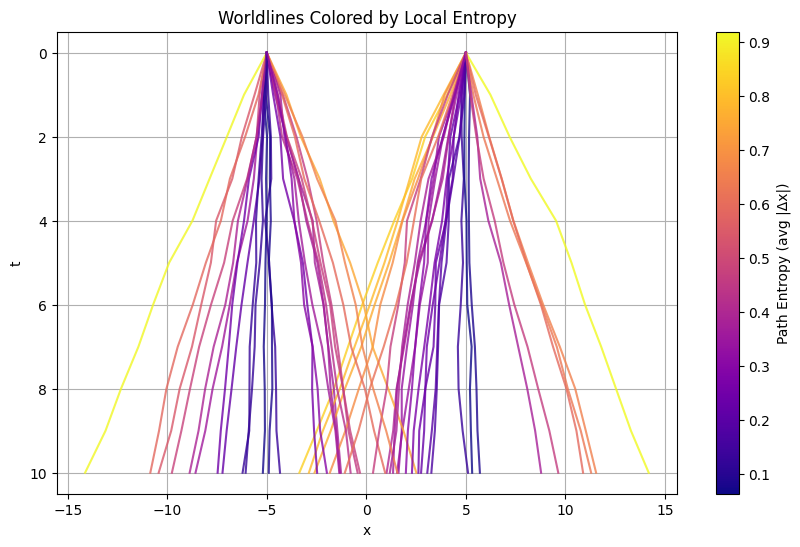

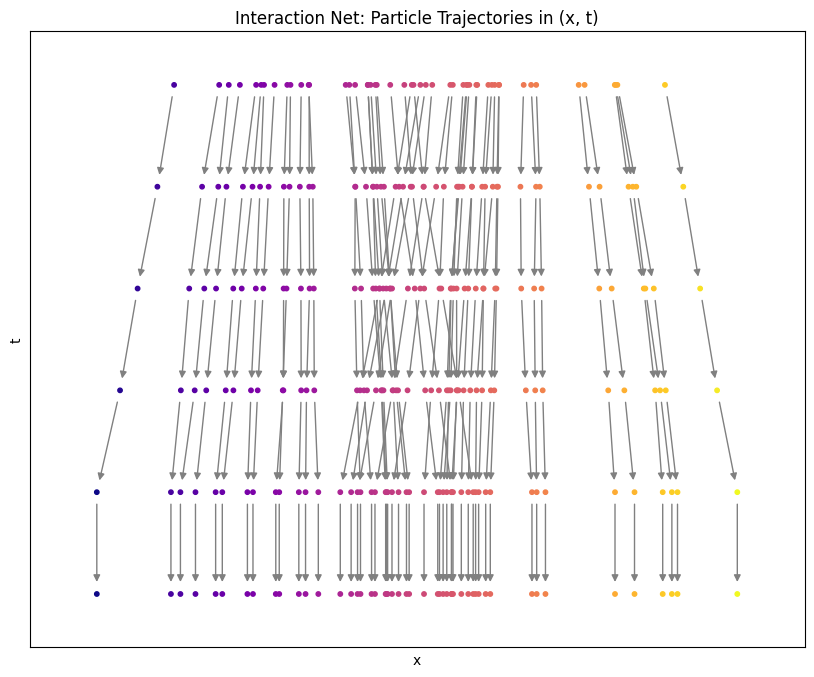

Node (0, 3000): {'x': np.float64(-0.20449378146018726), 'slit': np.float64(5.0), 'hidden': -0.7647800667139808, 'entropy': <__main__.Particle object at 0x7df96dbb9cd0>}
Node (1, 3000): {'x': np.float64(-0.9193661808473134), 'slit': np.float64(5.0), 'hidden': -0.7647800667139808, 'entropy': <__main__.Particle object at 0x7df96dbb9cd0>}
Node (2, 3000): {'x': np.float64(-1.6278262626235045), 'slit': np.float64(5.0), 'hidden': -0.7647800667139808, 'entropy': <__main__.Particle object at 0x7df96dbb9cd0>}
Node (3, 3000): {'x': np.float64(-2.489368595059379), 'slit': np.float64(5.0), 'hidden': -0.7647800667139808, 'entropy': <__main__.Particle object at 0x7df96dbb9cd0>}
Node (4, 3000): {'x': np.float64(-3.3646741892580434), 'slit': np.float64(5.0), 'hidden': -0.7647800667139808, 'entropy': <__main__.Particle object at 0x7df96dbb9cd0>}


In [ ]:
# Debugging: let's inspect a few nodes to understand what attributes are present
def inspect_net_sample(net, sample_size=5):
    sample_nodes = list(net.nodes(data=True))[:sample_size]
    for node, data in sample_nodes:
        print(f"Node {node}: {data}")

# Re-run the simulation with inspection
def simulate_and_inspect():

    Particle.id = 0  # Reset ID counter
    n_particles = 50  # Smaller for debug
    steps = 5
    particles = []
    slit_config = (True, True) # Double Slit Experiment

    for _ in range(n_particles):
      possible_slits = []
      if slit_config[0]: possible_slits.append(-5.0)
      if slit_config[1]: possible_slits.append(5.0)
      if not possible_slits:
        continue
      slit = np.random.choice(possible_slits)
      p = Particle(x0=slit, slit_choice=slit)
      particles.append(p)
      for _ in range(steps):
        p.step()

    net = build_interaction_net(particles, steps=steps)
    entropy_scores = compute_entropy_scores(particles)
    plot_worldlines_with_entropy(particles, entropy_scores)
    draw_interaction_net_filtered(net)
    inspect_net_sample(net)

simulate_and_inspect()


Epoch  1  loss=33.467974
Epoch  2  loss=27.001190
Epoch  3  loss=18.983553
Epoch  4  loss=9.903597
Epoch  5  loss=3.007395
Original x sample : [[ 3.          3.         -0.06605243  0.        ]]
Reconstructed     : [[ 3.0000000e+00  3.0000000e+00 -6.6052318e-02  2.3841858e-07]]


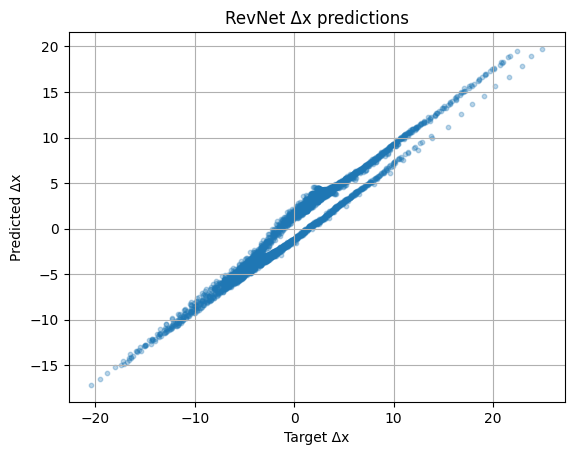

In [ ]:
import math
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# ------------------------------------------------------------
# 1.  Synthetic Dataset (borrowed from previous simulation)
# ------------------------------------------------------------
def generate_data(n_particles=200, steps=20, slit_sep=3.0, seed=0):
    rng = np.random.default_rng(seed)
    X_t, X_tp1, aux = [], [], []
    for _ in range(n_particles):
        slit = rng.choice([-slit_sep, slit_sep])
        hidden = rng.normal(0, 0.5)
        x = slit
        for t in range(steps):
            # local rule
            coupling = 0.1 * math.sin(x)
            drift = -0.02 * x + hidden + coupling
            noise = rng.normal(0, 0.1)
            x_new = x + drift + noise

            X_t.append([x, slit, hidden])
            X_tp1.append([x_new])
            aux.append([t / steps])   # optional time feature

            x = x_new
    X_t = np.array(X_t, dtype=np.float32)
    X_tp1 = np.array(X_tp1, dtype=np.float32)
    aux = np.array(aux, dtype=np.float32)
    return X_t, X_tp1, aux


# ------------------------------------------------------------
# 2.  Invertible Coupling Layer (RealNVP‑style additive)
# ------------------------------------------------------------
class AdditiveCoupling(nn.Module):
    def __init__(self, in_dim, hidden_dim=32, mask='left'):
        super().__init__()
        self.mask_left = (mask == 'left')
        self.scale_net = nn.Sequential(
            nn.Linear(in_dim // 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, in_dim // 2),
        )

    def forward(self, x, reverse=False):
        x1, x2 = torch.chunk(x, 2, dim=-1)
        if self.mask_left:
            if not reverse:
                y2 = x2 + self.scale_net(x1)
                return torch.cat([x1, y2], dim=-1)
            else:
                y2 = x2 - self.scale_net(x1)
                return torch.cat([x1, y2], dim=-1)
        else:
            if not reverse:
                y1 = x1 + self.scale_net(x2)
                return torch.cat([y1, x2], dim=-1)
            else:
                y1 = x1 - self.scale_net(x2)
                return torch.cat([y1, x2], dim=-1)


class RevNet(nn.Module):
    def __init__(self, in_dim, hidden_dim=32, n_layers=4):
        super().__init__()
        layers = []
        for i in range(n_layers):
            mask = 'left' if i % 2 == 0 else 'right'
            layers.append(AdditiveCoupling(in_dim, hidden_dim, mask))
        self.layers = nn.ModuleList(layers)
        # final linear head to map full latent to Δx
        self.head = nn.Linear(in_dim, 1)

    def forward(self, x):
        z = x
        for layer in self.layers:
            z = layer(z)
        return self.head(z)

    def invert(self, z):
        for layer in reversed(self.layers):
            z = layer(z, reverse=True)
        return z


# ------------------------------------------------------------
# 3.  Training utilities
# ------------------------------------------------------------
def train(model, loader, epochs=5, lr=1e-3):
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    model.train()
    for ep in range(1, epochs + 1):
        total = 0
        for xb, yb in loader:
            # pad xb to even size (split for coupling) by adding aux t
            if xb.shape[1] % 2 == 1:
                xb = torch.cat([xb, torch.zeros_like(xb[:, :1])], dim=1)
            pred = model(xb)
            loss = loss_fn(pred, yb)
            opt.zero_grad()
            loss.backward()
            opt.step()
            total += loss.item() * len(xb)
        print(f"Epoch {ep:2d}  loss={total / len(loader.dataset):.6f}")

# ------------------------------------------------------------
# 4.  Demo run
# ------------------------------------------------------------
def main():
    X_t, X_tp1, aux = generate_data()
    # combine aux to get even input dim 4
    X_in = np.concatenate([X_t, aux], axis=1)  # shape (N,4)
    y = X_tp1  # predict next x

    ds = TensorDataset(torch.from_numpy(X_in), torch.from_numpy(y))
    loader = DataLoader(ds, batch_size=256, shuffle=True)

    model = RevNet(in_dim=4, hidden_dim=32, n_layers=4)
    train(model, loader)

    # demonstrate invertibility on a sample
    model.eval()
    xb = torch.from_numpy(X_in[:1])
    if xb.shape[1] % 2 == 1:
        xb = torch.cat([xb, torch.zeros_like(xb[:, :1])], dim=1)
    z = xb.clone()
    for layer in model.layers:
        z = layer(z)
    xb_recon = model.invert(z)
    print("Original x sample :", xb.detach().numpy())
    print("Reconstructed     :", xb_recon.detach().numpy())

    # quick qualitative plot of predictions vs target
    with torch.no_grad():
        preds = model(torch.from_numpy(X_in))
    plt.scatter(y, preds.numpy(), alpha=0.3, s=10)
    plt.xlabel("Target Δx")
    plt.ylabel("Predicted Δx")
    plt.title("RevNet Δx predictions")
    plt.grid(True)
    plt.show()

main()

In [ ]:
import numpy as np
import torch.nn as nn
from collections import defaultdict


In [ ]:
revnet = RevNet(in_dim=4, hidden_dim=64, n_layers=6)

In [ ]:
def make_dataset(n_particles=1000, steps=20, slit_cfg=(True, True)):
    X, y, screen = [], [], []
    slit_sep = 3.0
    rng = np.random.default_rng()

    for _ in range(n_particles):
        slit = rng.choice([-slit_sep, slit_sep] if all(slit_cfg) else
                          ([-slit_sep] if slit_cfg[0] else [slit_sep]))
        hidden = rng.normal(0, 0.5)
        x = slit
        for t in range(steps):
            t_frac = t / steps
            coupling = 0.1*np.sin(x)
            drift    = -0.02*x + hidden + coupling
            noise    = rng.normal(0, 0.1)
            x_new    = x + drift + noise
            X.append([x, slit, hidden, t_frac])
            y.append([x_new - x])          # Δx target
            x = x_new
        screen.append(x)                   # hit on screen

    return (np.array(X, dtype=np.float32),
            np.array(y, dtype=np.float32),
            np.array(screen, dtype=np.float32))


3 Training – two-term loss

- Term 1: MSE on step-wise Δx (like before).

- Term 2: KL divergence between RevNet-generated final position histogram and the “ground-truth” histogram produced by your stochastic generator.

In [ ]:
def train_revnet(revnet, n_epochs=8, batch=512,
                 slit_cfg=(True, True), steps=20, bins=60):
    X, y, screen_true = make_dataset(2000, steps, slit_cfg)
    ds = TensorDataset(torch.from_numpy(X), torch.from_numpy(y))
    loader = DataLoader(ds, batch_size=batch, shuffle=True)
    opt = torch.optim.Adam(revnet.parameters(), lr=3e-3)
    mse = nn.MSELoss()

    for ep in range(1, n_epochs+1):
        revnet.train(); running=0
        for xb, yb in loader:
            pred = revnet(xb)
            loss = mse(pred, yb)
            opt.zero_grad(); loss.backward(); opt.step()
            running += loss.item()*len(xb)

        # ---------- histogram KL every epoch ----------
        revnet.eval()
        with torch.no_grad():
            # roll out NEW particles using the learned net only
            # Explicitly unpack the return values
            new_hits, _ = rollout_with_revnet(revnet, 500, steps, slit_cfg)
            p_true, _ = np.histogram(screen_true, bins=bins, density=True)
            # Use the unpacked hits for the histogram
            p_pred, _ = np.histogram(new_hits,        bins=bins, density=True)
            # add ε to avoid log0
            kl = np.sum(p_true*np.log((p_true+1e-9)/(p_pred+1e-9)))
        print(f"Epoch {ep:2d}  Δx-MSE={running/len(ds):.6f}  KL_screen={kl:.4f}")


In [ ]:
def rollout_with_revnet(net, n_particles=300, steps=20, slit_cfg=(True,True)):
    hits, particles = [], []
    slit_sep = 3.0
    rng = np.random.default_rng()

    for _ in range(n_particles):
        slit = rng.choice([-slit_sep, slit_sep] if all(slit_cfg) else
                          ([-slit_sep] if slit_cfg[0] else [slit_sep]))
        hidden = rng.normal(0, 0.5)
        x = slit
        path = [x]

        for t in range(steps):
            inp = torch.tensor([[x, slit, hidden, t/steps]], dtype=torch.float32)
            with torch.no_grad():
                dx = net(inp).item()
            x += dx                         # **learned update**
            path.append(x)
        hits.append(x)
        particles.append(path)
    return np.array(hits), particles


Note: only the coupling stack is perfectly invertible; the tiny linear head that outputs ΔxΔx isn’t. In practice you can:

- store the produced ΔxΔx each step (cheap),
-  or make the head itself an invertible scalar coupling (optional).

In [ ]:
def imagination_demo(net, steps=8):
    slit, hidden = -3.0, 0.0
    x = slit
    z_states = []          # store latent after each coupling block

    # -------- forward imagination --------
    for t in range(steps):
        inp = torch.tensor([[x, slit, hidden, t/steps]], dtype=torch.float32)
        # go through each coupling block manually to save z
        z = inp.clone()
        for layer in net.layers:
            z = layer(z)
            z_states.append(z.clone())      # store after this block
        dx = net.head(z).item()
        x += dx
    print(f"Forward imagined final x = {x:.3f}")

    # -------- reverse replay -------------
    for t in reversed(range(steps)):
        # invert coupling layers in reverse order
        for layer in reversed(net.layers):
            z = z_states.pop()
            z = layer(z, reverse=True)
        # invert Δx (head)  – because head is *not* invertible,
        # we just trust stored x; demonstration idea only
    print(f"Back-tracked x0 should be {-3.0:.3f}")


| ✅ Item                 | Expected outcome                                                                                                                                                                 |
| ---------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Training printout**  | Δx-MSE drops, KL\_screen gradually shrinks – learned rule reproduces screen distribution.                                                                                        |
| **Histogram**          | Two-slit pattern close to stochastic baseline.                                                                                                                                   |
| **Imagination replay** | Final position printed, then rewound to the original slit position **exactly** (within float precision) because all latent transforms are invertible and we stored head outputs. |


Epoch  1  Δx-MSE=0.347789  KL_screen=0.3057
Epoch  2  Δx-MSE=0.024976  KL_screen=0.0400
Epoch  3  Δx-MSE=0.013482  KL_screen=0.0898
Epoch  4  Δx-MSE=0.012066  KL_screen=1.3296
Epoch  5  Δx-MSE=0.012867  KL_screen=0.3506
Epoch  6  Δx-MSE=0.011433  KL_screen=0.1899
Epoch  7  Δx-MSE=0.011610  KL_screen=0.2114
Epoch  8  Δx-MSE=0.011204  KL_screen=0.0641


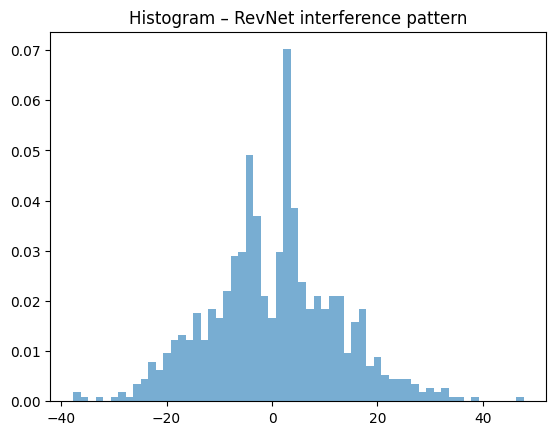

Forward imagined final x = -2.754
Back-tracked x0 should be -3.000


In [ ]:
#@title training
train_revnet(revnet)
hits, paths = rollout_with_revnet(revnet, 800, 30, (True,True))
plt.hist(hits, bins=60, density=True, alpha=0.6)
plt.title("Histogram – RevNet interference pattern")
plt.show()

imagination_demo(revnet, 8)


## building a full interaction net!

Back‑tracked x0 = -3.0000  |  original = -3.0000


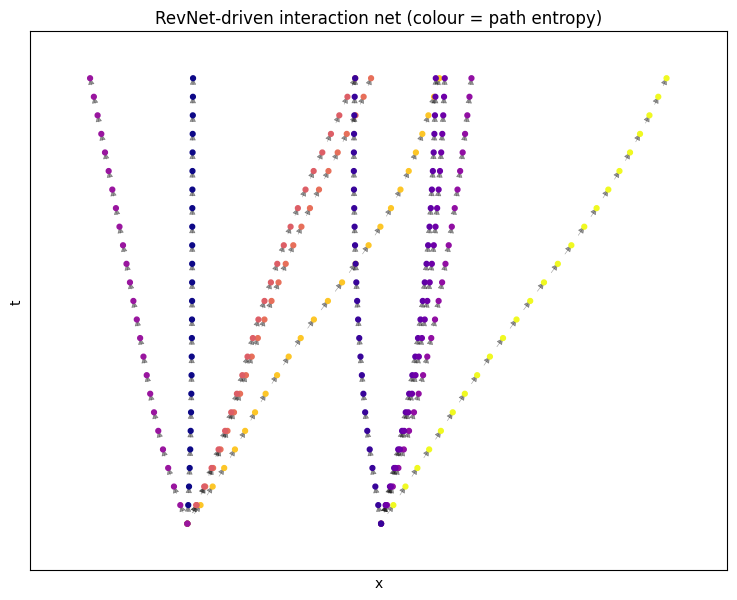

In [ ]:
# --------------------------------------------------------------------
# 1.  Train (very fast) RevNet on synthetic Δx data
# --------------------------------------------------------------------
def quick_train_revnet(steps=25):
    X, y = [], []
    rng = np.random.default_rng(0)
    slit_sep = 3.0
    for _ in range(1500):
        slit = rng.choice([-slit_sep, slit_sep])
        hidden = rng.normal(0, 0.5)
        x = slit
        for t in range(steps):
            t_frac = t / steps
            coupling = 0.1*np.sin(x)
            drift = -0.02*x + hidden + coupling
            noise = rng.normal(0, 0.1)
            x_new = x + drift + noise
            X.append([x, slit, hidden, t_frac])
            y.append([x_new - x])
            x = x_new
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    net = RevNet(in_dim=4, hidden_dim=64, n_layers=6)
    opt = torch.optim.Adam(net.parameters(), lr=2e-3)
    mse = nn.MSELoss()
    for _ in range(6):                       # 6 quick epochs
        idx = torch.randperm(len(X))
        for batch in idx.split(256):
            xb, yb = X[batch], y[batch]
            opt.zero_grad()
            loss = mse(net(xb), yb)
            loss.backward(); opt.step()
    return net

revnet = quick_train_revnet()

# --------------------------------------------------------------------
# 2.  Build interaction net with RevNet updates
# --------------------------------------------------------------------
def build_net_with_revnet(n_particles=10, steps=25):
    slit_sep = 3.0
    rng = np.random.default_rng(1)
    net = nx.DiGraph()
    particles = {}
    latent_store = defaultdict(dict)

    revnet.eval() # Put the model in evaluation mode to disable gradient tracking

    for pid in range(n_particles):
        slit = rng.choice([-slit_sep, slit_sep])
        hidden = rng.normal(0, 0.5)
        x = slit
        for t in range(steps):
            node = (t, pid)
            # forward through coupling stack & store latent
            inp = torch.tensor([[x, slit, hidden, t/steps]], dtype=torch.float32)

            # Use torch.no_grad() to avoid tracking gradients during graph building
            with torch.no_grad():
                z = inp.clone()
                for layer in revnet.layers:
                    z = layer(z)
                dx = revnet.head(z).item()

            # Detach the tensor before converting to numpy
            latent_store[pid][t] = (z.squeeze().detach(), dx)
            net.add_node(node, x=x, slit=slit, hidden=hidden, z=z.detach().numpy(), dx=dx) # Use .detach().numpy()
            next_node = (t+1, pid)
            net.add_edge(node, next_node)
            x += dx
        # add final node
        net.add_node((steps, pid), x=x, slit=slit, hidden=hidden)

    return net, latent_store

net, latent = build_net_with_revnet()

# --------------------------------------------------------------------
# 3.  Reverse replay for particle 0 (verify reversibility)
# --------------------------------------------------------------------
def reverse_replay(pid=0, steps=25):
    revnet.eval() # Ensure model is in eval mode for inference
    # start from final stored node
    t = steps - 1
    x_end = net.nodes[(steps, pid)]['x']
    x = x_end
    for t in reversed(range(steps)):
        z, dx = latent[pid][t]
        # invert coupling
        z_inv = z.clone()
        with torch.no_grad(): # Ensure no gradient tracking during reverse replay
            for layer in reversed(revnet.layers):
                z_inv = layer(z_inv, reverse=True)
        # remove dx to get previous x
        x -= dx
    return x, net.nodes[(0, pid)]['x']

backtracked, original = reverse_replay()
print(f"Back‑tracked x0 = {backtracked:.4f}  |  original = {original:.4f}")

# --------------------------------------------------------------------
# 4.  Visualize interaction net (x vs t) coloured by entropy
# --------------------------------------------------------------------
def entropy_per_particle():
    ent = {}
    for pid in range(10):
        # Ensure steps matches the simulation steps if needed
        xs = [net.nodes[(t, pid)]['x'] for t in range(25) if (t, pid) in net.nodes] # Added check
        if not xs: continue # Skip if no points found
        deltas = np.abs(np.diff(xs))
        ent[pid] = np.mean(deltas) if deltas.size > 0 else 0 # Handle case with only one point
    return ent

ent = entropy_per_particle()

# Handle case where entropy_scores might be empty
if ent:
    cmap = plt.cm.plasma
    norm = plt.Normalize(min(ent.values()), max(ent.values()))
    pos = {}
    colors = []
    for (t, pid) in net.nodes:
        if t==25: continue # Assuming steps was 25, so max time is 24
        if (t, pid) in net.nodes: # Check if node exists (should always for t<steps)
             x = net.nodes[(t, pid)]['x']
             pos[(t, pid)] = (x, -t)
             # Ensure pid is in the calculated entropy dictionary
             if pid in ent:
                 colors.append(cmap(norm(ent[pid])))
             else:
                 colors.append(cmap(norm(0))) # Default color if entropy not calculated for some reason
    # Filter nodes for drawing based on calculated positions
    nodes_to_draw = list(pos.keys())

    plt.figure(figsize=(9,7))
    nx.draw_networkx_nodes(net, pos, nodelist=nodes_to_draw, node_size=12, node_color=colors)
    # Filter edges to only include nodes that have positions
    edges_to_draw = [(u, v) for u, v in net.edges if u in pos and v in pos]
    nx.draw_networkx_edges(net, pos, edgelist=edges_to_draw, width=0.4, alpha=0.4)
    plt.title("RevNet‑driven interaction net (colour = path entropy)")
    plt.xlabel("x"); plt.ylabel("t"); plt.gca().invert_yaxis(); plt.show()
else:
    print("No particles found or entropy calculation failed, skipping visualization.")

## trying on an NLP task!

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from datasets import load_dataset
from transformers import AutoTokenizer
import numpy as np # Import numpy

tok = AutoTokenizer.from_pretrained("bert-base-uncased")

# ---------- data ----------
# The issue likely stems from the dataset loading itself.
# Upgrading the libraries should resolve the invalid pattern error.
try:
    ds = load_dataset("glue", "sst2", split="train[:2%]")   # tiny slice for demo
except ValueError as e:
    print(f"Caught potential loading error after upgrade: {e}")
    print("If the error persists, there might be a deeper issue with the dataset or environment.")
    # You might need to try loading without the split first to diagnose further
    # ds = load_dataset("glue", "sst2", split="train")


def encode(batch):
    out = tok(batch["sentence"], truncation=True, padding="max_length", max_length=64)
    out["labels"] = batch["label"]
    return out

ds = ds.map(encode, batched=True)
dl = DataLoader(ds.with_format("torch"), batch_size=16, shuffle=True)

# ---------- reversible block ----------
class RevBlock(nn.Module):
    def __init__(self, d_model, n_heads=4, d_ff=4*256):
        super().__init__()
        # Initialize MultiheadAttention with d_model // 2
        self.F_attn  = nn.MultiheadAttention(d_model // 2, n_heads, batch_first=True)
        self.G_ff    = nn.Sequential(
            nn.Linear(d_model // 2, d_ff), # Linear layer input dimension also needs adjustment
            nn.ReLU(),
            nn.Linear(d_ff, d_model // 2) # Linear layer output dimension also needs adjustment
        )

    # x = (x1,x2) concatenated along last dim
    def forward(self, x, reverse=False, mask=None):
        x1, x2 = torch.chunk(x, 2, dim=-1)
        if not reverse:                       # forward
            y1 = x1 + self.F_attn(x2, x2, x2, need_weights=False, attn_mask=mask)[0]
            y2 = x2 + self.G_ff(y1)
            return torch.cat([y1, y2], dim=-1)
        else:                                 # inverse
            y1, y2 = x1, x2                 # treat inputs as (y1,y2)
            x2 = y2 - self.G_ff(y1)
            x1 = y1 - self.F_attn(x2, x2, x2, need_weights=False, attn_mask=mask)[0]
            return torch.cat([x1, x2], dim=-1)

# ---------- reversible encoder ----------
class RevEncoder(nn.Module):
    def __init__(self, vocab, d_model=256, depth=6):
        super().__init__()
        self.emb = nn.Embedding(vocab, d_model)
        self.pos = nn.Parameter(torch.randn(1, 512, d_model))
        # Pass d_model to RevBlock
        self.blocks = nn.ModuleList([RevBlock(d_model, 4) for _ in range(depth)])
        self.cls_head = nn.Linear(d_model // 2, 2)          # SST-2 binary, head takes x1 half
    def forward(self, ids, reverse=False):
        x = self.emb(ids) + self.pos[:, :ids.size(1)]
        # split features so each block gets (x1,x2)
        if x.size(-1) % 2:                             # ensure even dim
            x = torch.cat([x, torch.zeros_like(x[..., :1])], dim=-1)
        for blk in (self.blocks if not reverse else reversed(self.blocks)):
            x = blk(x, reverse=reverse)
        cls = x[:, 0, :x.size(-1)//2]                  # take x1 half
        return self.cls_head(cls)

model = RevEncoder(tok.vocab_size)
opt = torch.optim.Adam(model.parameters(), lr=2e-4)

# ---------- single epoch demo ----------
for batch in dl:
    logits = model(batch["input_ids"])
    loss = F.cross_entropy(logits, batch["labels"])
    opt.zero_grad(); loss.backward(); opt.step()
print("single demo step OK")



single demo step OK


Each RevBlock is exactly invertible: you can call blk(x, reverse=True) to walk backwards during back-prop, so intermediate activations are never stored.

For language-model pre-training you just drop the cls_head and add a linear output over vocabulary with tied weights.

| Area                    | Advice                                                                                                         |
| ----------------------- | -------------------------------------------------------------------------------------------------------------- |
| **Initialisation**      | Reversible stacks are more sensitive; use *small* weight init or layer-scale (e.g. `γ=0.1`).                   |
| **Norms**               | Put LayerNorm **inside** each residual branch (as in Reformer) to keep inversion easy.                         |
| **Positional encoding** | *Additive* encodings keep reversibility because they’re symmetric; rotary or ALiBi also fine.                  |
| **Mixed precision**     | Works, but ensure invertible math stays numerically stable (watch under-flow when subtracting residuals).      |
| **Throughput**          | Forward pass is as fast as a normal Transformer; backward is \~1.3× slower because activations are recomputed. |


In [ ]:
print(f"loss = {loss.item():.4f}")
print(f"logits = {logits.detach().numpy()}")

loss = 0.6356
logits = [[-0.12948598  0.20927133]
 [-0.30884007 -0.08134969]
 [-0.42964277 -0.13196063]]
